#### Customer Segmentation
This Python script performs customer segmentation using various clustering algorithms on a dataset containing customer information. 

#### Problem Description
The problem addressed in this script is that of customer segmentation, aiming to divide customers into distinct groups based on their annual income and spending score. By clustering customers, businesses can better understand their diverse customer base and tailor marketing strategies accordingly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as clus
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
# Load the dataset
dataset = pd.read_csv('dataset.csv')

In [4]:
# Display dataset information
print("Dataset Shape:", dataset.shape)
print("\nDataset Description:\n", dataset.describe())
print("\nFirst 5 Rows of the Dataset:\n", dataset.head(5))

Dataset Shape: (200, 5)

Dataset Description:
        CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000

First 5 Rows of the Dataset:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5

In [5]:
# Label encoding for 'Gender' column
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [6]:
# Separating features for clustering
features = dataset[['Annual Income (k$)', 'Spending Score']]

# Feature scaling
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

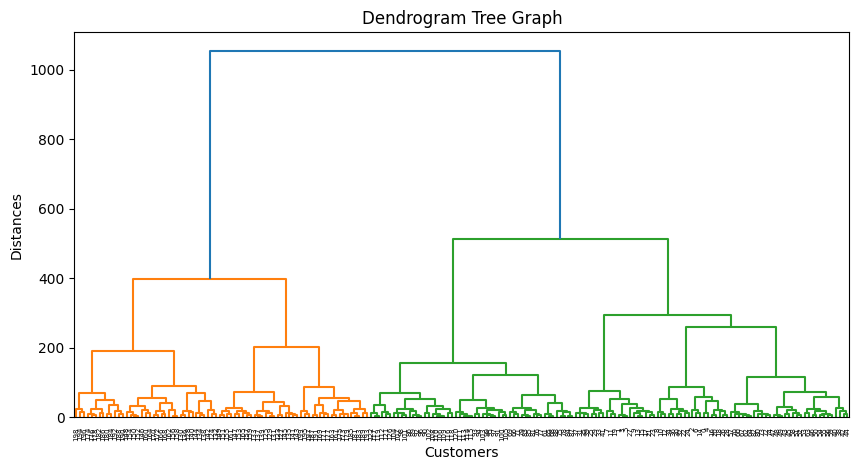

In [7]:
# Visualize Dendrogram Tree Graph
plt.figure(figsize=(10, 5))
dendrogram = clus.dendrogram(clus.linkage(dataset, method='ward'))
plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

Silhouette Score for Hierarchical Clustering: 0.5538089226688662


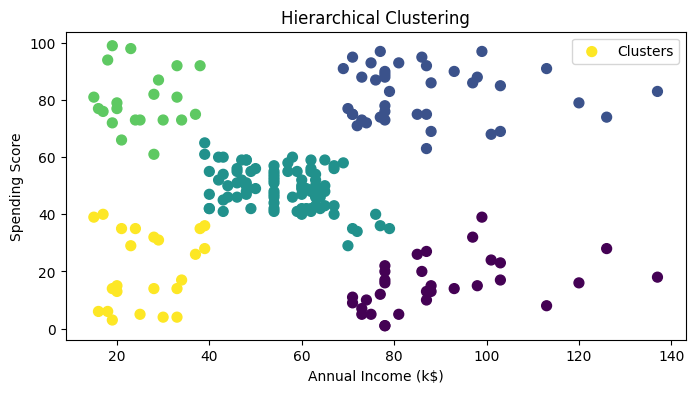

In [15]:
# Visualize Clusters
plt.figure(figsize=(8, 4))

# Hierarchical Clustering Model
hierarchical_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(scaled_features)
plt.scatter(features['Annual Income (k$)'], features['Spending Score'], s=50, c=y_hierarchical, cmap='viridis', label='Clusters')
plt.title('Hierarchical Clustering')
silhouette_hierarchical = silhouette_score(scaled_features, y_hierarchical)
print("Silhouette Score for Hierarchical Clustering:", silhouette_hierarchical)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


Silhouette Score for KMeans Clustering: 0.5546571631111091


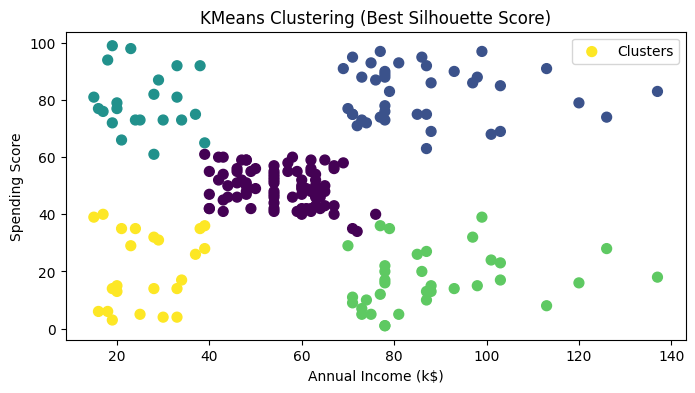

In [17]:
# KMeans Clustering Model
best_silhouette = -1
best_kmeans_model = None
best_kmeans_clusters = None
best_k = None

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans_model.fit_predict(scaled_features)
    silhouette_kmeans = silhouette_score(scaled_features, y_kmeans)
    if silhouette_kmeans > best_silhouette:
        best_silhouette = silhouette_kmeans
        best_kmeans_model = kmeans_model
        best_kmeans_clusters = y_kmeans
        best_k = k

# Visualize KMeans Clustering with Best Silhouette Score
plt.figure(figsize=(8, 4))
plt.scatter(
    features["Annual Income (k$)"],
    features["Spending Score"],
    s=50,
    c=best_kmeans_clusters,
    cmap="viridis",
    label="Clusters",
)
plt.title("KMeans Clustering (Best Silhouette Score)")
print("Silhouette Score for KMeans Clustering:", best_silhouette)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


Best Silhouette Score for DBSCAN Clustering: 0.4064046962444789
Best eps: 0.5
Best min_samples: 10
Silhouette Score for DBSCAN Clustering: 0.4064046962444789


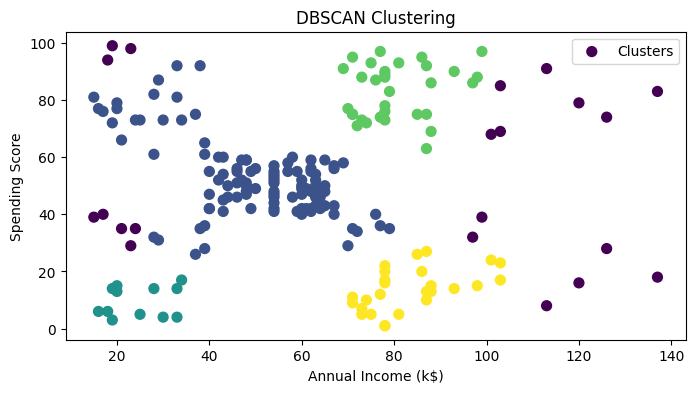

In [19]:
# Optimizing DBSCAN Parameters
best_silhouette_dbscan = -1
best_eps = None
best_min_samples = None
for eps in [0.1, 0.5, 1.0]:
    for min_samples in [2, 5, 10]:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan_model.fit_predict(scaled_features)
        unique_labels = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)  # Exclude noise points (-1)
        if unique_labels > 1:
            silhouette_dbscan = silhouette_score(scaled_features, y_dbscan)
        if silhouette_dbscan > best_silhouette_dbscan:
            best_silhouette_dbscan = silhouette_dbscan
            best_eps = eps
            best_min_samples = min_samples

print("Best Silhouette Score for DBSCAN Clustering:", best_silhouette_dbscan)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

# DBSCAN Clustering Model with Best Parameters
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan = dbscan_model.fit_predict(scaled_features)

# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 4))
plt.scatter(
    features['Annual Income (k$)'],
    features['Spending Score'],
    s=50,
    c=y_dbscan,
    cmap='viridis',
    label='Clusters'
)
plt.title('DBSCAN Clustering')
silhouette_dbscan = silhouette_score(scaled_features, y_dbscan)
print("Silhouette Score for DBSCAN Clustering:", silhouette_dbscan)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


Silhouette Score for Birch Clustering: 0.41445036622016135


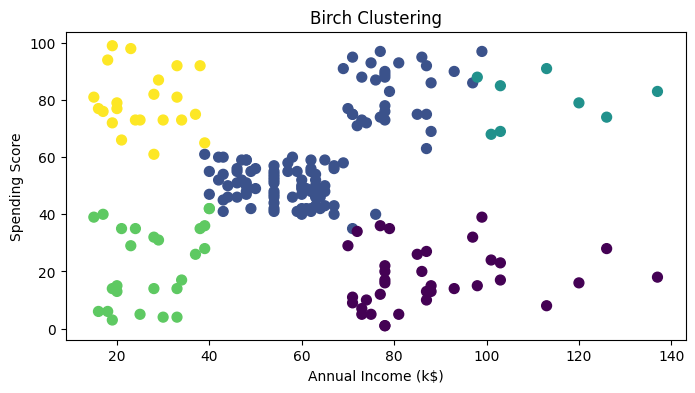

In [21]:
# Birch Clustering Model
birch_model = Birch(n_clusters=5)
y_birch = birch_model.fit_predict(scaled_features)

# Check if the number of clusters identified by Birch is less than the expected number
if len(set(y_birch)) < 5:
    print("Birch clustering identified fewer than 5 clusters. Adjusting the number of clusters...")
    birch_model = Birch(n_clusters=len(set(y_birch)))
    y_birch = birch_model.fit_predict(scaled_features)

# Visualize Birch Clustering
plt.figure(figsize=(8, 4))
plt.scatter(
    features['Annual Income (k$)'],
    features['Spending Score'],
    s=50,
    c=y_birch,
    cmap='viridis',
    label='Clusters'
)
plt.title('Birch Clustering')
silhouette_birch = silhouette_score(scaled_features, y_birch)
print("Silhouette Score for Birch Clustering:", silhouette_birch)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend
plt.show()